In [1]:
import torch 
from train import trainAR
from models import *
from matplotlib import pyplot as plt
import build

In [10]:
def gen_signal(freq):
    return torch.sin(freq * torch.arange(0, 1000).float()).view(1, 1000) * 0.9
dataset = [(gen_signal(f), 0) for f in torch.arange(0.1, 1.0, 0.01)]
loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [25]:
c = 100
model = Sequential(
    TypeI(1, c, 1, shift=1),
    TypeIII(c, c, 2),
    TypeIII(c, c, 4),
    TypeIII(c, c, 8),
    TypeIII(c, c, 16),
    TypeIII(c, c, 32),
    TypeIII(c, c, 64),
    TypeI(c, 1, 128),
    torch.nn.Tanh()
)
print(sum(p.numel() for p in model.parameters()), 'parameters')
print(model)

241802 parameters
Sequential(
  (0): TypeI(
    (bn): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): Activation(negative_slope=0.2)
    (conv): CausalConv(1, 100, kernel_size=2, dilation=1, shift=1, bias=False)
  )
  (1): TypeIII(
    (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_sigma): CausalConv(100, 100, kernel_size=2, dilation=2, shift=0, bias=False)
    (conv_tanh): CausalConv(100, 100, kernel_size=2, dilation=2, shift=0, bias=False)
  )
  (2): TypeIII(
    (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_sigma): CausalConv(100, 100, kernel_size=2, dilation=4, shift=0, bias=False)
    (conv_tanh): CausalConv(100, 100, kernel_size=2, dilation=4, shift=0, bias=False)
  )
  (3): TypeIII(
    (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_sigma): CausalConv(100, 100, kernel_size=2, dilation=8, s

In [28]:
trainAR(
    trial=None,
    device='cpu',
    loader=loader,
    model=model,
    optim=torch.optim.Adam(model.parameters()),
    sched=None,
    criterion=build.criterion(),
    logger=build.logger(console=True, save_rate=None, sample_rate=None), # fix sampling
    epochs=10
)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 0.00	mse: 0.0020755049772560596 

Epoch: 0.11	mse: 0.02018282562494278 

Epoch: 0.22	mse: 0.021378034725785255 

Epoch: 0.33	mse: 0.019135547801852226 

Epoch: 0.44	mse: 0.008178962394595146 

Epoch: 0.56	mse: 0.015644105151295662 

Epoch: 0.67	mse: 0.014220001175999641 

Epoch: 0.78	mse: 0.018635140731930733 

Epoch: 0.89	mse: 0.012019984424114227 


 10%|█         | 1/10 [00:02<00:26,  2.96s/it]


Epoch: 1.00	mse: 0.011012258939445019 

Epoch: 1.11	mse: 0.011845743283629417 

Epoch: 1.22	mse: 0.012522862292826176 

Epoch: 1.33	mse: 0.01770869828760624 

Epoch: 1.44	mse: 0.008941863663494587 

Epoch: 1.56	mse: 0.009777134284377098 

Epoch: 1.67	mse: 0.009727398864924908 

Epoch: 1.78	mse: 0.014402139000594616 

Epoch: 1.89	mse: 0.00812411867082119 


 20%|██        | 2/10 [00:05<00:23,  2.91s/it]


Epoch: 2.00	mse: 0.011828260496258736 

Epoch: 2.11	mse: 0.009498369880020618 

Epoch: 2.22	mse: 0.01210077665746212 

Epoch: 2.33	mse: 0.008413279429078102 

Epoch: 2.44	mse: 0.0065231528133153915 

Epoch: 2.56	mse: 0.010612767189741135 

Epoch: 2.67	mse: 0.010049810633063316 

Epoch: 2.78	mse: 0.0059896050952374935 

Epoch: 2.89	mse: 0.007738061714917421 


 30%|███       | 3/10 [00:08<00:20,  2.95s/it]


Epoch: 3.00	mse: 0.005353317130357027 

Epoch: 3.11	mse: 0.006487875245511532 

Epoch: 3.22	mse: 0.009515027515590191 

Epoch: 3.33	mse: 0.0050608813762664795 

Epoch: 3.44	mse: 0.004898848943412304 

Epoch: 3.56	mse: 0.0042144241742789745 

Epoch: 3.67	mse: 0.0069891600869596004 

Epoch: 3.78	mse: 0.0049427771009504795 

Epoch: 3.89	mse: 0.004839275497943163 


 40%|████      | 4/10 [00:11<00:17,  2.95s/it]


Epoch: 4.00	mse: 0.005066429730504751 

Epoch: 4.11	mse: 0.006139340344816446 

Epoch: 4.22	mse: 0.006908973678946495 

Epoch: 4.33	mse: 0.0040293848142027855 

Epoch: 4.44	mse: 0.004658835008740425 

Epoch: 4.56	mse: 0.005587444175034761 

Epoch: 4.67	mse: 0.005611632484942675 

Epoch: 4.78	mse: 0.0028354916721582413 

Epoch: 4.89	mse: 0.0032273284159600735 


 50%|█████     | 5/10 [00:14<00:14,  2.95s/it]


Epoch: 5.00	mse: 0.002381809987127781 

Epoch: 5.11	mse: 0.003839906770735979 

Epoch: 5.22	mse: 0.0043181502260267735 

Epoch: 5.33	mse: 0.0028297998942434788 

Epoch: 5.44	mse: 0.0031729198526591063 

Epoch: 5.56	mse: 0.0026845766697078943 

Epoch: 5.67	mse: 0.0039975629188120365 

Epoch: 5.78	mse: 0.0035314480774104595 

Epoch: 5.89	mse: 0.0038297614082694054 


 60%|██████    | 6/10 [00:17<00:11,  2.99s/it]


Epoch: 6.00	mse: 0.0026890661101788282 

Epoch: 6.11	mse: 0.0037534378934651613 

Epoch: 6.22	mse: 0.004378330893814564 

Epoch: 6.33	mse: 0.0025025622453540564 

Epoch: 6.44	mse: 0.002984448568895459 

Epoch: 6.56	mse: 0.0027150537353008986 

Epoch: 6.67	mse: 0.0031681754626333714 

Epoch: 6.78	mse: 0.00427745608612895 

Epoch: 6.89	mse: 0.002985060913488269 


 70%|███████   | 7/10 [00:20<00:09,  3.05s/it]


Epoch: 7.00	mse: 0.002633937168866396 

Epoch: 7.11	mse: 0.003159048268571496 

Epoch: 7.22	mse: 0.0023905341513454914 

Epoch: 7.33	mse: 0.0039519332349300385 

Epoch: 7.44	mse: 0.004447317216545343 

Epoch: 7.56	mse: 0.001801783568225801 

Epoch: 7.67	mse: 0.0024454460944980383 

Epoch: 7.78	mse: 0.0026694932021200657 

Epoch: 7.89	mse: 0.0046163215301930904 


 80%|████████  | 8/10 [00:24<00:06,  3.21s/it]


Epoch: 8.00	mse: 0.0027793271001428366 

Epoch: 8.11	mse: 0.0030607867520302534 

Epoch: 8.22	mse: 0.003075916785746813 

Epoch: 8.33	mse: 0.0027136432472616434 

Epoch: 8.44	mse: 0.0037405460607260466 

Epoch: 8.56	mse: 0.0024222577922046185 

Epoch: 8.67	mse: 0.0018557277508080006 

Epoch: 8.78	mse: 0.0022954714950174093 

Epoch: 8.89	mse: 0.0029066777788102627 


 90%|█████████ | 9/10 [00:28<00:03,  3.37s/it]


Epoch: 9.00	mse: 0.002548723481595516 

Epoch: 9.11	mse: 0.004646598361432552 

Epoch: 9.22	mse: 0.004010308533906937 

Epoch: 9.33	mse: 0.003766092238947749 

Epoch: 9.44	mse: 0.0028226191643625498 

Epoch: 9.56	mse: 0.003083606483414769 

Epoch: 9.67	mse: 0.0021347436122596264 

Epoch: 9.78	mse: 0.001676147454418242 

Epoch: 9.89	mse: 0.0035851923748850822 


100%|██████████| 10/10 [00:31<00:00,  3.18s/it]


0.0031415590783581138

In [5]:
from tqdm.notebook import tqdm

In [37]:
def gen(x, model):
    x = torch.cat((x[-1000:], torch.zeros(1, 1)), dim=1)
    y = model(x.unsqueeze(0)).squeeze(0)
    x[0, -1] = y[0, -1]
    return x.clone()

x = gen_signal(0.2) + gen_signal(0.1) / 1.8
model.eval()
for i in tqdm(range(200)):
    x = gen(x, model)

  0%|          | 0/200 [00:00<?, ?it/s]

In [38]:
t = x.clone()

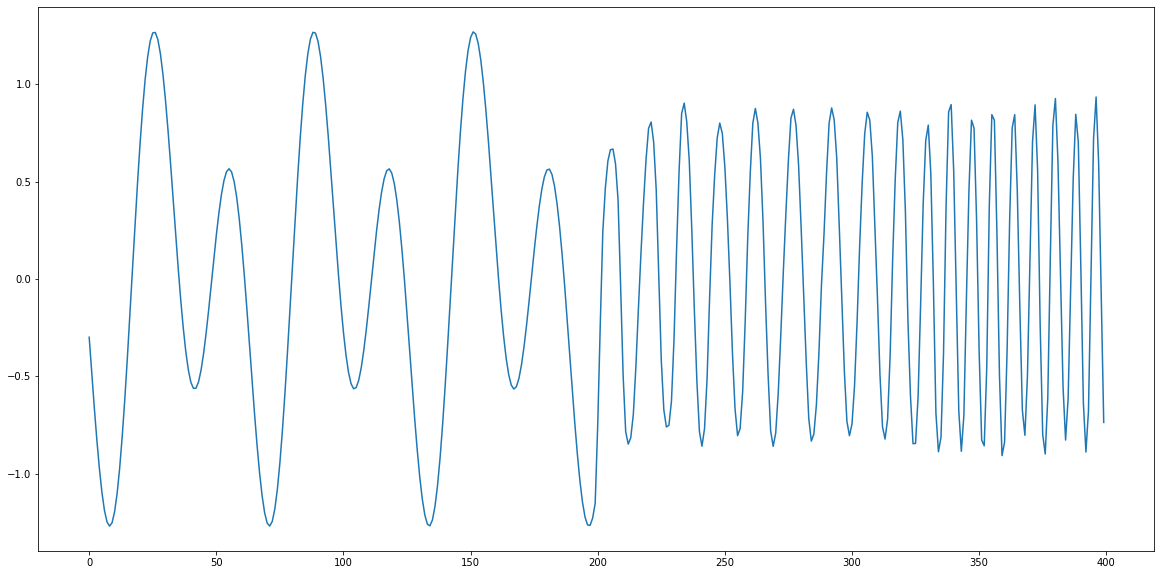

In [39]:
plt.figure(figsize=(20, 10))
t = x[0, 800:]
plt.plot(t.detach())
plt.plot(t[:-500].detach())
plt.show()

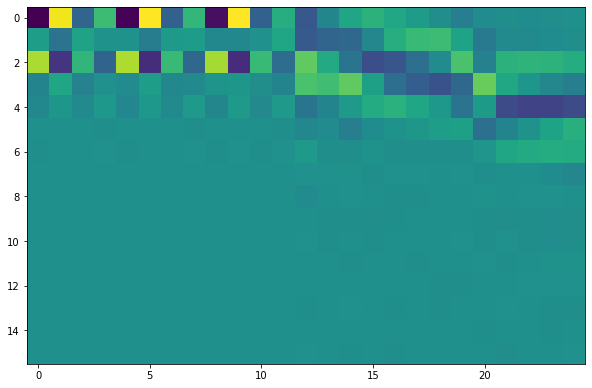

In [40]:
from dct import sdct
s = 16
w = sdct(t.detach().numpy(), frame_length=s, frame_step=s)
plt.figure(figsize=(10, 10))
plt.imshow(w)
plt.show()